In [142]:
# for data analysis
import numpy as np
import pandas as pd

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# importing KMeans for clustering, Linear Regression for linear relationship b/w variables 
# and Silhouette score to evaluate the quality of clusters
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score

#for normalization in KMeans clustering
from sklearn.preprocessing import StandardScaler

#for warnings
import os
import warnings

In [143]:
# reading and printing first 5 rows of the dataset
cardiodata = pd.read_csv("CardioGoodFitness.csv")
cardiodata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [144]:
#shape of dataset
cardiodata.shape

(180, 9)

In [145]:
# datatypes within dataset
cardiodata.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [146]:
# checking missing values
cardiodata.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [147]:
# checking for duplicate values
cardiodata.duplicated().sum()

0

In [148]:
# finding basic describe
cardiodata.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# STATISTICS

In [149]:
def statistical_analysis(cardiodata):
    """
    Function to perform the statistical analysis on the dataset
    """
    numericdata = cardiodata.select_dtypes(include = ['number'])    
    # Perform analysis on numeric columns only
    if numericdata.empty:
        print("No numeric data available for analysis.")
        return   
    # Statistical Summary (mean, median, standard deviation)
    summary = numericdata.describe().T  # Transpose to better view the summary
    summary['skewness'] = numericdata.skew()  # Skewness
    summary['kurtosis'] = numericdata.kurtosis()  # Kurtosis
    # Display statistical analysis
    print("Statistical Analysis:\n", summary)
    # summarizing
    print("\nDetailed Explanation:")
    for column in numericdata.columns:
        mean = numericdata[column].mean()
        median = numericdata[column].median()
        std_dev = numericdata[column].std()
        skew = numericdata[column].skew()
        kurt = numericdata[column].kurtosis()

        print(f"\n{column} Statistics:")
        print(f" - Mean: {mean}")
        print(f" - Median: {median}")
        print(f" - Standard Deviation: {std_dev}")
        print(f" - Skewness: {skew}")
        print(f" - Kurtosis: {kurt}")     
        # Explanation
        if skew > 0:
            print(f" - {column} has a positive skew, hence the data is skewed to the right.")
        elif skew < 0:
            print(f" - {column} has a negative skew, hence the data is skewed to the left.")
        else:
            print(f" - {column} has a symmetrical distribution.")
        if kurt > 3:
            print(f" - {column} has a leptokurtic distribution (more peaked than normal).")
        elif kurt < 3:
            print(f" - {column} has a platykurtic distribution (flatter than normal).")
        else:
            print(f" - {column} has a mesokurtic distribution (normal peak).")          
        return
statistical_analysis(cardiodata)

Statistical Analysis:
            count          mean           std      min       25%      50%  \
Age        180.0     28.788889      6.943498     18.0     24.00     26.0   
Education  180.0     15.572222      1.617055     12.0     14.00     16.0   
Usage      180.0      3.455556      1.084797      2.0      3.00      3.0   
Fitness    180.0      3.311111      0.958869      1.0      3.00      3.0   
Income     180.0  53719.577778  16506.684226  29562.0  44058.75  50596.5   
Miles      180.0    103.194444     51.863605     21.0     66.00     94.0   

                75%       max  skewness  kurtosis  
Age           33.00      50.0  0.982161  0.409710  
Education     16.00      21.0  0.622294  1.033342  
Usage          4.00       7.0  0.739494  0.542790  
Fitness        4.00       5.0  0.454800 -0.369228  
Income     58668.00  104581.0  1.291785  1.373567  
Miles        114.75     360.0  1.724497  4.321381  

Detailed Explanation:

Age Statistics:
 - Mean: 28.788888888888888
 - Median: 2

# BAR PLOT

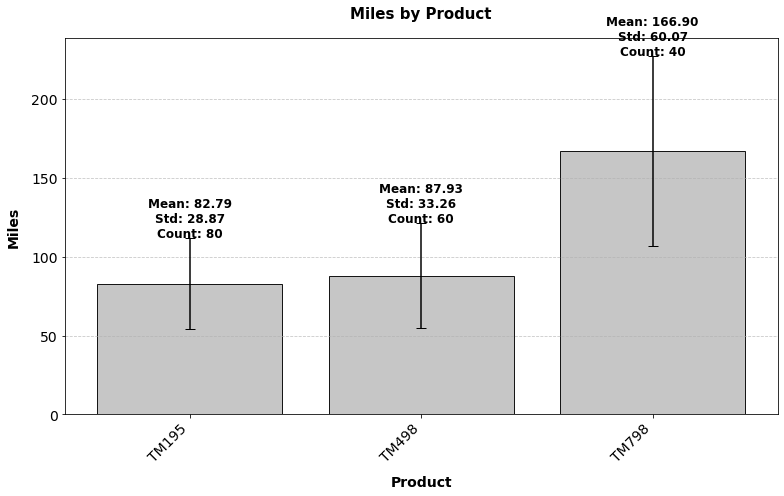

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def bar_plot(cardiodata, categorical_column='Product', value_column='Miles'):
    """
    The bar plot function analyzes how far individuals travel based on the product they purchase.
    """
    # Grouping the data to calculate mean, standard deviation, and count for statistical analysis
    grouped_data = cardiodata.groupby(categorical_column)[value_column].agg(['mean', 'std', 'count']).sort_values('mean') 
    plt.figure(figsize = (11, 7))
    # Plotting bars
    plt.bar(
        grouped_data.index, 
        grouped_data['mean'], 
        color = 'silver', 
        edgecolor = 'black', 
        alpha = 0.9
    )
    # Adding error bars for standard deviation
    plt.errorbar(
        grouped_data.index, 
        grouped_data['mean'], 
        yerr = grouped_data['std'], 
        fmt = 'none', 
        color = 'black', 
        capsize = 5, 
        label = 'Standard Deviation'
    )
    # Customize the title and labels
    plt.title(
        f"{value_column} by {categorical_column}",
        fontsize = 15,
        weight = "bold",
        pad = 20
    )
    plt.xlabel(categorical_column, fontsize = 14, weight = "bold", labelpad = 10)
    plt.ylabel(value_column, fontsize = 14, weight = "bold", labelpad = 10)   
    # Adjust x-axis labels for readability
    plt.xticks(rotation = 45, ha = 'right', fontsize = 14)  
    plt.yticks(fontsize = 14)
    plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
    for i, value in enumerate(grouped_data['mean']):
        plt.text(
            i, value + grouped_data['std'][i] + 0.5, 
            f'Mean: {value:.2f}\nStd: {grouped_data["std"][i]:.2f}\nCount: {grouped_data["count"][i]}', 
            ha = 'center', fontsize = 12, weight = "bold"
        )
    plt.tight_layout()
    plt.show()
bar_plot(cardiodata, categorical_column = 'Product', value_column = 'Miles')

# BOX PLOT

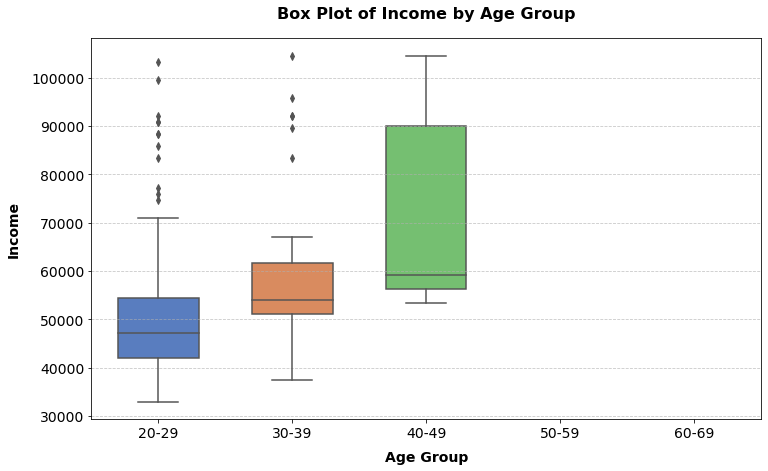

In [151]:
def box_plot():
    """
    The box plot function creates a box plot with 'Income' as the dependent variable
    and 'Age' grouped into categories for visualization.
    """
    plt.figure(figsize=(12, 7))
    # Create age bins for grouping if necessary
    cardiodata['Age_Group'] = pd.cut(cardiodata['Age'], bins = [20, 30, 40, 50, 60, 70], 
                                    labels = ['20-29', '30-39', '40-49', '50-59', '60-69'])
    # Create the box plot
    sns.boxplot(
        x = 'Age_Group', 
        y = 'Income', 
        data = cardiodata, 
        palette = 'muted', 
        width = 0.6, 
        linewidth = 1.5
    )
    # Customize the title and labels
    plt.title("Box Plot of Income by Age Group", fontsize = 16, fontweight = 'bold', pad = 20)
    plt.xlabel("Age Group", fontsize = 14, weight = "bold", labelpad = 10)
    plt.ylabel("Income", fontsize = 14, weight = "bold", labelpad = 10)
    # Improve axis ticks
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    # Show grid lines for reference
    plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
    # Display the plot
    plt.show()
box_plot()

# ELBOW PLOT WITH KMEANS CLUSTERING

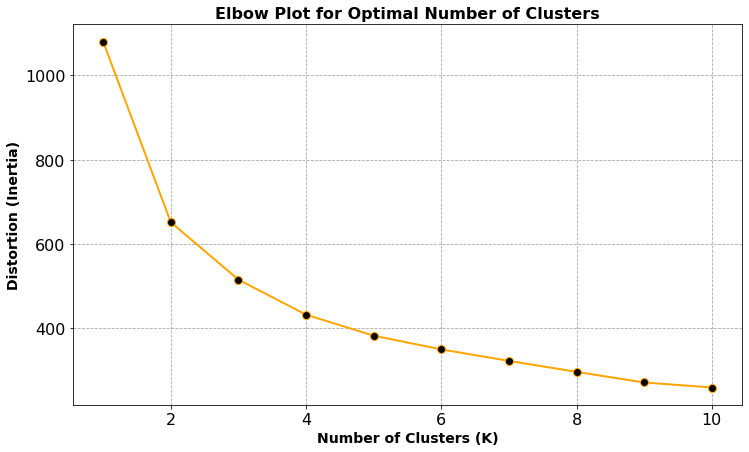

In [152]:
# Selecting only numeric columns from the dataset
data_numeric = cardiodata.select_dtypes(include = [np.number])

# Normalizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric) 

# Setting the number of threads to 1 to avoid the memory leak warning
os.environ['OMP_NUM_THREADS'] = '1'
warnings.filterwarnings("ignore", message = ".*KMeans is known to have a memory leak.*")

#Performing the KMeans clustering and plotting the elbow curve
def elbow_plot():
    """
    The Elbow plot function is used to determine the optimal number of clusters for KMeans clustering.
    """
    # creating an empty list to store inertia values for different k values
    distortions = []
    # Checking for K values from 1 to 10
    K = range(1, 11)  
    for k in K:
        kmeans = KMeans(n_clusters = k, random_state = 42)
        kmeans.fit(data_scaled)  
        distortions.append(kmeans.inertia_)  
    # Plotting the elbow graph
    plt.figure(figsize=(12, 7))
    plt.plot(K, distortions, marker = 'o', color = 'orange', linestyle = '-', linewidth = 2, markersize = 8, 
            markerfacecolor = 'black')
    plt.title("Elbow Plot for Optimal Number of Clusters", fontsize = 16, fontweight = 'bold')
    plt.xlabel("Number of Clusters (K)", fontsize = 14, weight = "bold")
    plt.ylabel("Distortion (Inertia)", fontsize = 14, weight = "bold")
    plt.grid(True, axis = 'both', linestyle = '--', alpha = 0.7, color = 'gray')
    plt.gca().set_facecolor('white')
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)  
    plt.show()
elbow_plot()

# SCATTER PLOT WITH LINE FITTING

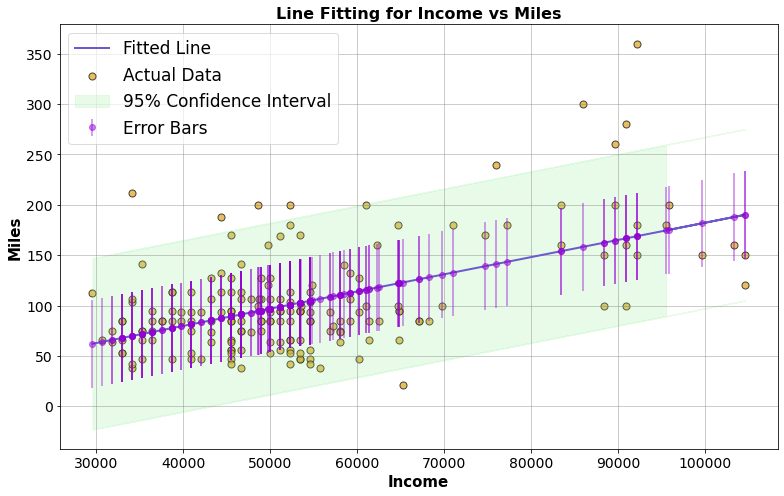

In [153]:
def scatter_plot():
    """
    The Line fitting function is to identify the relationship between two variables.
    """
    x_column = 'Income'
    y_column = 'Miles'   
    # Extract the columns for x and y
    x = cardiodata[[x_column]].values
    y = cardiodata[y_column].values      
    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(x, y)
    predictions = model.predict(x)      
    # Calculate the residuals (errors)
    residuals = y - predictions
    # Standard error of the estimate
    standard_error = np.std(residuals) 
    plt.figure(figsize = (11, 7))     
    # Scatter plot for the actual data points with enhanced appearance
    plt.scatter(x, y, color = 'goldenrod', edgecolors = 'black', alpha = 0.7, s = 50, label = "Actual Data")     
    # adding color
    plt.plot(x, predictions, color = 'slateblue', linewidth = 2, label = "Fitted Line")  
    # Adding error bars
    plt.errorbar(x, predictions, yerr = standard_error, fmt = 'o', color = 'darkviolet', alpha = 0.5, label = 'Error Bars')
    # Add a 95% confidence interval for the predictions
    confidence_interval = 1.96 * standard_error
    plt.fill_between(x.flatten(), 
                     predictions - confidence_interval, 
                     predictions + confidence_interval, 
                     color = 'lightgreen', alpha = 0.2, label = '95% Confidence Interval')
    # Customize the plot's title, labels, and legend
    plt.title(f"Line Fitting for {x_column} vs {y_column}", fontsize = 16, fontweight = 'bold')
    plt.xlabel(x_column, fontsize = 15, weight = "bold")
    plt.ylabel(y_column, fontsize = 15, weight = "bold")  
    plt.legend(fontsize = 17, framealpha = 0.7, loc = 'upper left') 
    plt.grid(True, axis = 'both', linestyle = '-', color = 'gray', alpha = 0.5)   
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)        
    plt.tight_layout()
    plt.show()
scatter_plot()